## EEG Emotion Prediction

Given *EEG data from subjects who were watching movies*, let's try to predict the **emotional state** of a subject during a given movie.

We will use a tensorflow recurrent neural network to make our predictions. 

Data source: https://www.kaggle.com/datasets/birdy654/eeg-brainwave-dataset-feeling-emotions

### Importing Libraries

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import confusion_matrix, classification_report

2025-02-16 15:18:36.643892: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: SSE4.1 SSE4.2 AVX AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
data = pd.read_csv('emotions.csv')
data

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b,label
0,4.620,30.3,-356.0,15.60,26.3,1.070,0.411,-15.700,2.060,3.15,...,23.50,20.300,20.300,23.50,-215.0,280.00,-162.00,-162.00,280.00,NEGATIVE
1,28.800,33.1,32.0,25.80,22.8,6.550,1.680,2.880,3.830,-4.82,...,-23.30,-21.800,-21.800,-23.30,182.0,2.57,-31.60,-31.60,2.57,NEUTRAL
2,8.900,29.4,-416.0,16.70,23.7,79.900,3.360,90.200,89.900,2.03,...,462.00,-233.000,-233.000,462.00,-267.0,281.00,-148.00,-148.00,281.00,POSITIVE
3,14.900,31.6,-143.0,19.80,24.3,-0.584,-0.284,8.820,2.300,-1.97,...,299.00,-243.000,-243.000,299.00,132.0,-12.40,9.53,9.53,-12.40,POSITIVE
4,28.300,31.3,45.2,27.30,24.5,34.800,-5.790,3.060,41.400,5.52,...,12.00,38.100,38.100,12.00,119.0,-17.60,23.90,23.90,-17.60,NEUTRAL
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2127,32.400,32.2,32.2,30.80,23.4,1.640,-2.030,0.647,-0.121,-1.10,...,-21.70,0.218,0.218,-21.70,95.2,-19.90,47.20,47.20,-19.90,NEUTRAL
2128,16.300,31.3,-284.0,14.30,23.9,4.200,1.090,4.460,4.720,6.63,...,594.00,-324.000,-324.000,594.00,-35.5,142.00,-59.80,-59.80,142.00,POSITIVE
2129,-0.547,28.3,-259.0,15.80,26.7,9.080,6.900,12.700,2.030,4.64,...,370.00,-160.000,-160.000,370.00,408.0,-169.00,-10.50,-10.50,-169.00,NEGATIVE
2130,16.800,19.9,-288.0,8.34,26.0,2.460,1.580,-16.000,1.690,4.74,...,124.00,-27.600,-27.600,124.00,-656.0,552.00,-271.00,-271.00,552.00,NEGATIVE


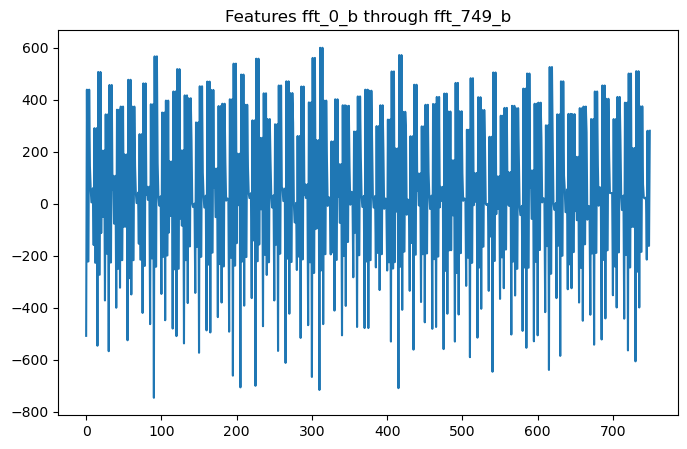

In [3]:
sample = data.loc[0, 'fft_0_b':'fft_749_b']

plt.figure(figsize=(8,5))
plt.plot(range(len(sample)), sample)
plt.title("Features fft_0_b through fft_749_b")
plt.show()

In [4]:
data["label"].value_counts()

label
NEUTRAL     716
NEGATIVE    708
POSITIVE    708
Name: count, dtype: int64

In [5]:
label_mapping = {'NEGATIVE': 0, 'NEUTRAL': 1, 'POSITIVE': 2}

### Preprocessing

In [6]:
df = data.copy()

df['label'] = df['label'].replace(label_mapping)

y = df['label'].copy()
X = df.drop('label', axis=1).copy()

/tmp/ipykernel_152/628392591.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['label'] = df['label'].replace(label_mapping)


In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, shuffle=True, random_state=123)

In [8]:
X_train

,# mean_0_a,mean_1_a,mean_2_a,mean_3_a,mean_4_a,mean_d_0_a,mean_d_1_a,mean_d_2_a,mean_d_3_a,mean_d_4_a,...,fft_740_b,fft_741_b,fft_742_b,fft_743_b,fft_744_b,fft_745_b,fft_746_b,fft_747_b,fft_748_b,fft_749_b
993,14.400,29.7,-112.0,18.50,22.9,-3.63000,-2.2200,-2.180,-3.240,-4.040,...,-50.0,150.00,-150.00,-150.00,150.00,63.6,83.80,-40.90,-40.90,83.80
1851,13.700,22.8,21.5,8.40,27.1,3.27000,1.1200,6.480,2.300,5.660,...,74.2,-76.00,-10.90,-10.90,-76.00,60.9,-60.40,-31.40,-31.40,-60.40
1253,-0.765,24.7,-578.0,11.90,27.9,-1.44000,-4.2000,-8.310,-4.340,4.040,...,-803.0,619.00,-331.00,-331.00,619.00,-551.0,545.00,-261.00,-261.00,545.00
1228,28.200,32.6,32.1,30.30,24.6,-0.00524,-0.0699,1.680,0.266,-4.470,...,167.0,-24.40,-18.10,-18.10,-24.40,181.0,4.94,-8.33,-8.33,4.94
1461,31.900,31.0,34.4,30.80,24.0,-4.74000,-1.4000,-0.351,-1.830,-5.390,...,130.0,-25.70,4.10,4.10,-25.70,131.0,-21.70,19.60,19.60,-21.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1593,6.820,32.9,-741.0,32.60,27.0,-0.41300,-2.6300,-87.300,-26.200,-3.350,...,-405.0,428.00,-160.00,-160.00,428.00,-468.0,451.00,-229.00,-229.00,451.00
1147,31.500,32.1,31.3,28.80,25.0,5.32000,-0.1400,1.370,5.610,8.300,...,132.0,-22.20,33.00,33.00,-22.20,148.0,-9.15,16.50,16.50,-9.15
1766,-11.800,26.3,-828.0,7.68,23.3,13.10000,-2.0100,21.900,2.890,-3.160,...,-579.0,640.00,-238.00,-238.00,640.00,-361.0,451.00,-195.00,-195.00,451.00
1122,27.600,32.2,28.8,25.60,24.1,-6.94000,1.0300,0.355,-8.380,-6.960,...,102.0,6.75,9.95,9.95,6.75,101.0,-25.90,42.90,42.90,-25.90


### Modeling

In [24]:
inputs = tf.keras.Input(shape=(X_train.shape[1],))

expand_dims = tf.expand_dims(inputs, axis=2)

gru = tf.keras.layers.GRU(256, return_sequences=True)(expand_dims)
flatten = tf.keras.layers.Flatten()(gru)

outputs = tf.keras.layers.Dense(3, activation='softmax')(flatten)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

print(model.summary())

Model: "model_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_2 (InputLayer)        [(None, 2548)]            0         
                                                                 
 tf.expand_dims (TFOpLambda)  (None, 2548, 1)          0         
                                                                 
 gru (GRU)                   (None, 2548, 256)         198912    
                                                                 
 flatten (Flatten)           (None, 652288)            0         
                                                                 
 dense_3 (Dense)             (None, 3)                 1956867   
                                                                 
Total params: 2,155,779
Trainable params: 2,155,779
Non-trainable params: 0
_________________________________________________________________
None


2025-02-16 15:46:34.712845: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-16 15:46:34.715832: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-16 15:46:34.719305: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

In [25]:
model.compile(
    optimizer='adam',
    loss = 'sparse_categorical_crossentropy',
    metrics=['accuracy']
)

history = model.fit(
    X_train,
    y_train,
    validation_split=0.2,
    batch_size=32,
    epochs=50,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/50


2025-02-16 15:47:29.816720: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-16 15:47:29.820100: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-16 15:47:29.823122: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - ETA: 0s - loss: 45.8264 - accuracy: 0.7326   

2025-02-16 15:49:40.717548: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-16 15:49:40.722188: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-16 15:49:40.724373: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

38/38 [==============================] - 141s 4s/step - loss: 45.8264 - accuracy: 0.7326 - val_loss: 26.0190 - val_accuracy: 0.8796
Epoch 2/50
38/38 [==============================] - 131s 3s/step - loss: 12.8143 - accuracy: 0.8810 - val_loss: 10.4598 - val_accuracy: 0.8060
Epoch 3/50
38/38 [==============================] - 118s 3s/step - loss: 2.2778 - accuracy: 0.9564 - val_loss: 5.0257 - val_accuracy: 0.9064
Epoch 4/50
38/38 [==============================] - 109s 3s/step - loss: 1.5068 - accuracy: 0.9665 - val_loss: 2.8298 - val_accuracy: 0.9565
Epoch 5/50
38/38 [==============================] - 114s 3s/step - loss: 0.6086 - accuracy: 0.9858 - val_loss: 1.7458 - val_accuracy: 0.9766
Epoch 6/50
38/38 [==============================] - 110s 3s/step - loss: 3.4971 - accuracy: 0.9480 - val_loss: 7.3439 - val_accuracy: 0.8863
Epoch 7/50
38/38 [==============================] - 109s 3s/step - loss: 0.7745 - accuracy: 0.9832 - val_loss: 3.5303 - val_accuracy: 0.9398
Epoch 8/50
38/38 [==

### Results

In [26]:
model_acc = model.evaluate(X_test, y_test)[1]
print("Test Accuracy: {:.3f}%".format(model_acc * 100))

20/20 [==============================] - 19s 948ms/step - loss: 1.9178 - accuracy: 0.9656
Test Accuracy: 96.562%


2025-02-16 16:12:00.384116: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_2_grad/concat/split_2/split_dim' with dtype int32
	 [[{{node gradients/split_2_grad/concat/split_2/split_dim}}]]
2025-02-16 16:12:00.389264: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You must feed a value for placeholder tensor 'gradients/split_grad/concat/split/split_dim' with dtype int32
	 [[{{node gradients/split_grad/concat/split/split_dim}}]]
2025-02-16 16:12:00.391236: I tensorflow/core/common_runtime/executor.cc:1197] [/device:CPU:0] (DEBUG INFO) Executor start aborting (this does not indicate an error and you can ignore this message): INVALID_ARGUMENT: You mus

20/20 [==============================] - 20s 974ms/step


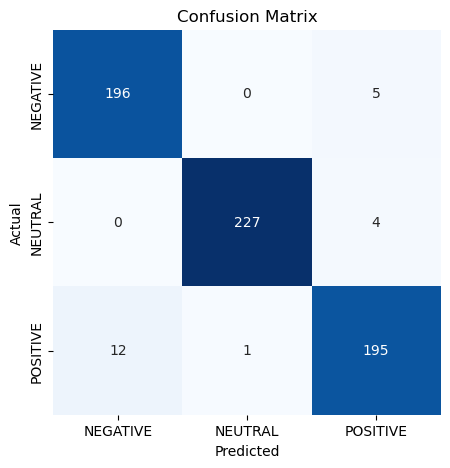

Classification Report:
-------------------------
               precision    recall  f1-score   support

    NEGATIVE       0.94      0.98      0.96       201
     NEUTRAL       1.00      0.98      0.99       231
    POSITIVE       0.96      0.94      0.95       208

    accuracy                           0.97       640
   macro avg       0.96      0.97      0.96       640
weighted avg       0.97      0.97      0.97       640



In [27]:
y_pred = np.array(list(map(lambda x: np.argmax(x), model.predict(X_test))))
cm = confusion_matrix(y_test, y_pred)
clr = classification_report(y_test, y_pred, target_names=label_mapping.keys())

plt.figure(figsize=(5,5))
sns.heatmap(cm, annot=True, vmin=0, fmt='g', cbar=False, cmap='Blues')
plt.xticks(np.arange(3) + 0.5, label_mapping.keys())
plt.yticks(np.arange(3) + 0.5, label_mapping.keys())
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:\n-------------------------\n", clr)